<a href="https://colab.research.google.com/github/Jenny-Tanananya/Diagram/blob/main/step0_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn.model_selection
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project_CE/heart_disease.csv')
df = pd.DataFrame(df)
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [6]:
print(df.isnull().sum())

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [7]:
print(df.isnull().mean() * 100)

Age                      0.29
Gender                   0.19
Blood Pressure           0.19
Cholesterol Level        0.30
Exercise Habits          0.25
Smoking                  0.25
Family Heart Disease     0.21
Diabetes                 0.30
BMI                      0.22
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
High LDL Cholesterol     0.26
Alcohol Consumption     25.86
Stress Level             0.22
Sleep Hours              0.25
Sugar Consumption        0.30
Triglyceride Level       0.26
Fasting Blood Sugar      0.22
CRP Level                0.26
Homocysteine Level       0.20
Heart Disease Status     0.00
dtype: float64


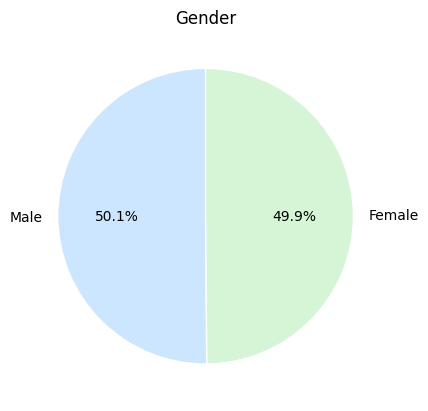

In [8]:
# นับจำนวน Yes / No
Gender = df['Gender'].value_counts()

# วาด bar chart
Gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#cce6ff','#d6f5d6'], wedgeprops={'edgecolor': '#ffffff', 'linewidth': 1})
plt.title('Gender')
plt.ylabel('')
plt.show()

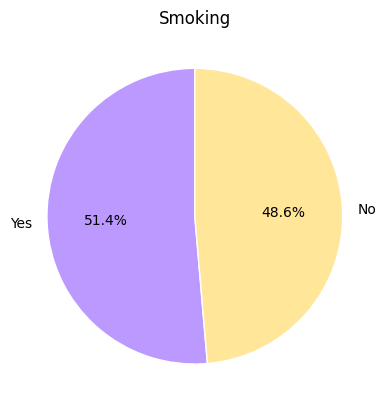

In [9]:
Smoking = df["Smoking"].value_counts()
# วาด bar chart
Smoking.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#bb99ff','#ffe699'], wedgeprops={'edgecolor': '#ffffff', 'linewidth': 1})
plt.title('Smoking')
plt.ylabel('')
plt.show()

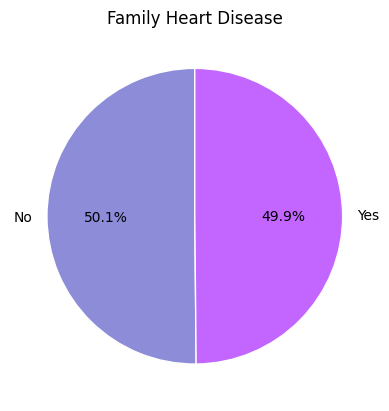

In [10]:
FHD = df["Family Heart Disease"].value_counts()
# วาด bar chart
FHD.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#8c8cd9','#c266ff'], wedgeprops={'edgecolor': '#ffffff', 'linewidth': 1})
plt.title('Family Heart Disease')
plt.ylabel('')
plt.show()

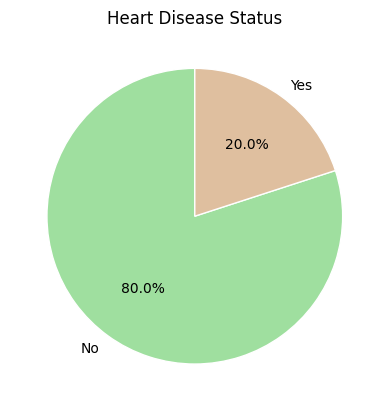

In [11]:
HDS = df["Heart Disease Status"].value_counts()
HDS.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#9fdf9f','#dfbf9f'], wedgeprops={'edgecolor': '#ffffff', 'linewidth': 1})
plt.title('Heart Disease Status')
plt.ylabel('')
plt.show()

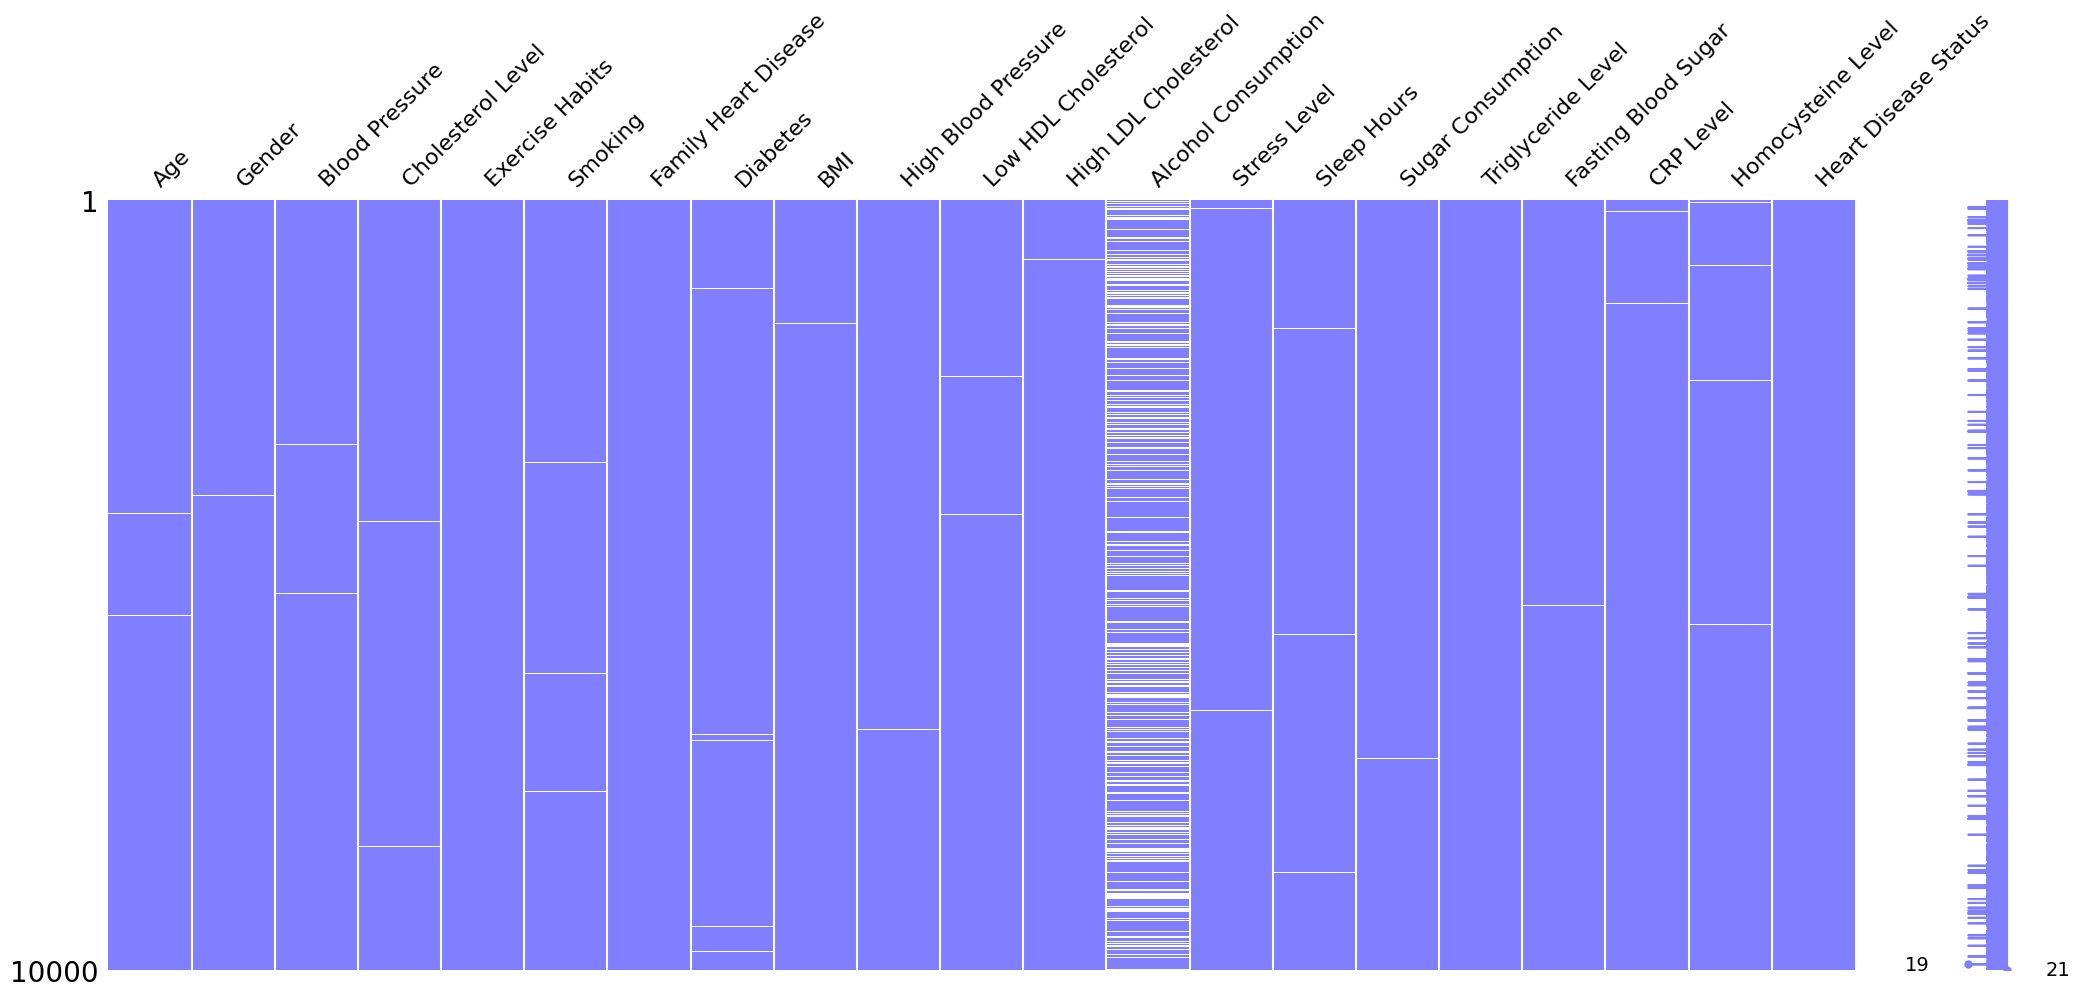

In [12]:
import missingno as msno
msno.matrix(df, color=(0.5, 0.5, 1))
plt.show()

จากกราฟสามารถที่จะดูความสัมพันธ์ของแต่ละ Feature ได้ โดยจะดูว่าค่าที่หายไปในแต่ละ Feature มีความสัมพันธ์ ที่จำเป็นมากหรือน้อยในแต่ Feature  
โดยมี Tpye ดังต่อไปนี้
##### Type of missing data
 *  Missing Completely at Random (MCAR)
  * No relationship between any values with missing
 *  Missing at Random (MAR)
  * Relationship between missiness and other observed data, but not the missing data
 *  Missing Not at Random (MNAR)
   * Relationship between missingess and its values
   


จากที่ดู เราจะมี MCAR และ MNAR
ในกรณีนี้เราใช่เพื่อกันค่า ซ้ำ

In [13]:
df.drop_duplicates()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,Female,136.0,243.0,Medium,Yes,No,No,18.788791,Yes,...,Yes,Medium,High,6.834954,Medium,343.0,133.0,3.588814,19.132004,Yes
9996,38.0,Male,172.0,154.0,Medium,No,No,No,31.856801,Yes,...,Yes,NaN,High,8.247784,Low,377.0,83.0,2.658267,9.715709,Yes
9997,73.0,Male,152.0,201.0,High,Yes,No,Yes,26.899911,No,...,Yes,NaN,Low,4.436762,Low,248.0,88.0,4.408867,9.492429,Yes
9998,23.0,Male,142.0,299.0,Low,Yes,No,Yes,34.964026,Yes,...,Yes,Medium,High,8.526329,Medium,113.0,153.0,7.215634,11.873486,Yes


และทำการ KNNImputer ในข้อมูล Alcohol Consumption

In [14]:
ordinal_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Alcohol Consumption'] = df['Alcohol Consumption'].map(ordinal_map)
df['Sugar Consumption'] = df['Sugar Consumption'].map(ordinal_map)
df['Stress Level'] = df['Stress Level'].map(ordinal_map)
df['Exercise Habits'] = df['Exercise Habits'].map(ordinal_map)

yesno_map = {'No': 0, 'Yes': 1}
df['Smoking'] = df['Smoking'].map(yesno_map)
df['Diabetes'] = df['Diabetes'].map(yesno_map)
df['Family Heart Disease'] = df['Family Heart Disease'].map(yesno_map)
df['High Blood Pressure'] = df['High Blood Pressure'].map(yesno_map)
df['Low HDL Cholesterol'] = df['Low HDL Cholesterol'].map(yesno_map)
df['High LDL Cholesterol'] = df['High LDL Cholesterol'].map(yesno_map)
df['Heart Disease Status'] = df['Heart Disease Status'].map(yesno_map)

gender_map = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender_map)

In [15]:

# Impute with mean value
#numeric_cols_mean = df.select_dtypes(include=['float64', 'int64'])
#mean_imputer = SimpleImputer(strategy='mean')
#df[numeric_cols_mean.columns] = mean_imputer.fit_transform(numeric_cols_mean)

# Impute with median value
numeric_cols_med = df.select_dtypes(include=['float64', 'int64'])
med_imputer = SimpleImputer(strategy='median')
df[numeric_cols_med.columns] = med_imputer.fit_transform(numeric_cols_med)

# Impute with mode (most frequent) value
#numeric_cols_mode = df.select_dtypes(include=['float64', 'int64'])
#mode_imputer = SimpleImputer(strategy='most_frequent')
#df[numeric_cols_mode.columns] = mode_imputer.fit_transform(numeric_cols_mode)

# Impute with constant (0) value
#numeric_cols_const = df.select_dtypes(include=['float64', 'int64'])
#const_imputer = SimpleImputer(strategy='constant', fill_value=0)
#df[numeric_cols_const.columns] = const_imputer.fit_transform(numeric_cols_const)

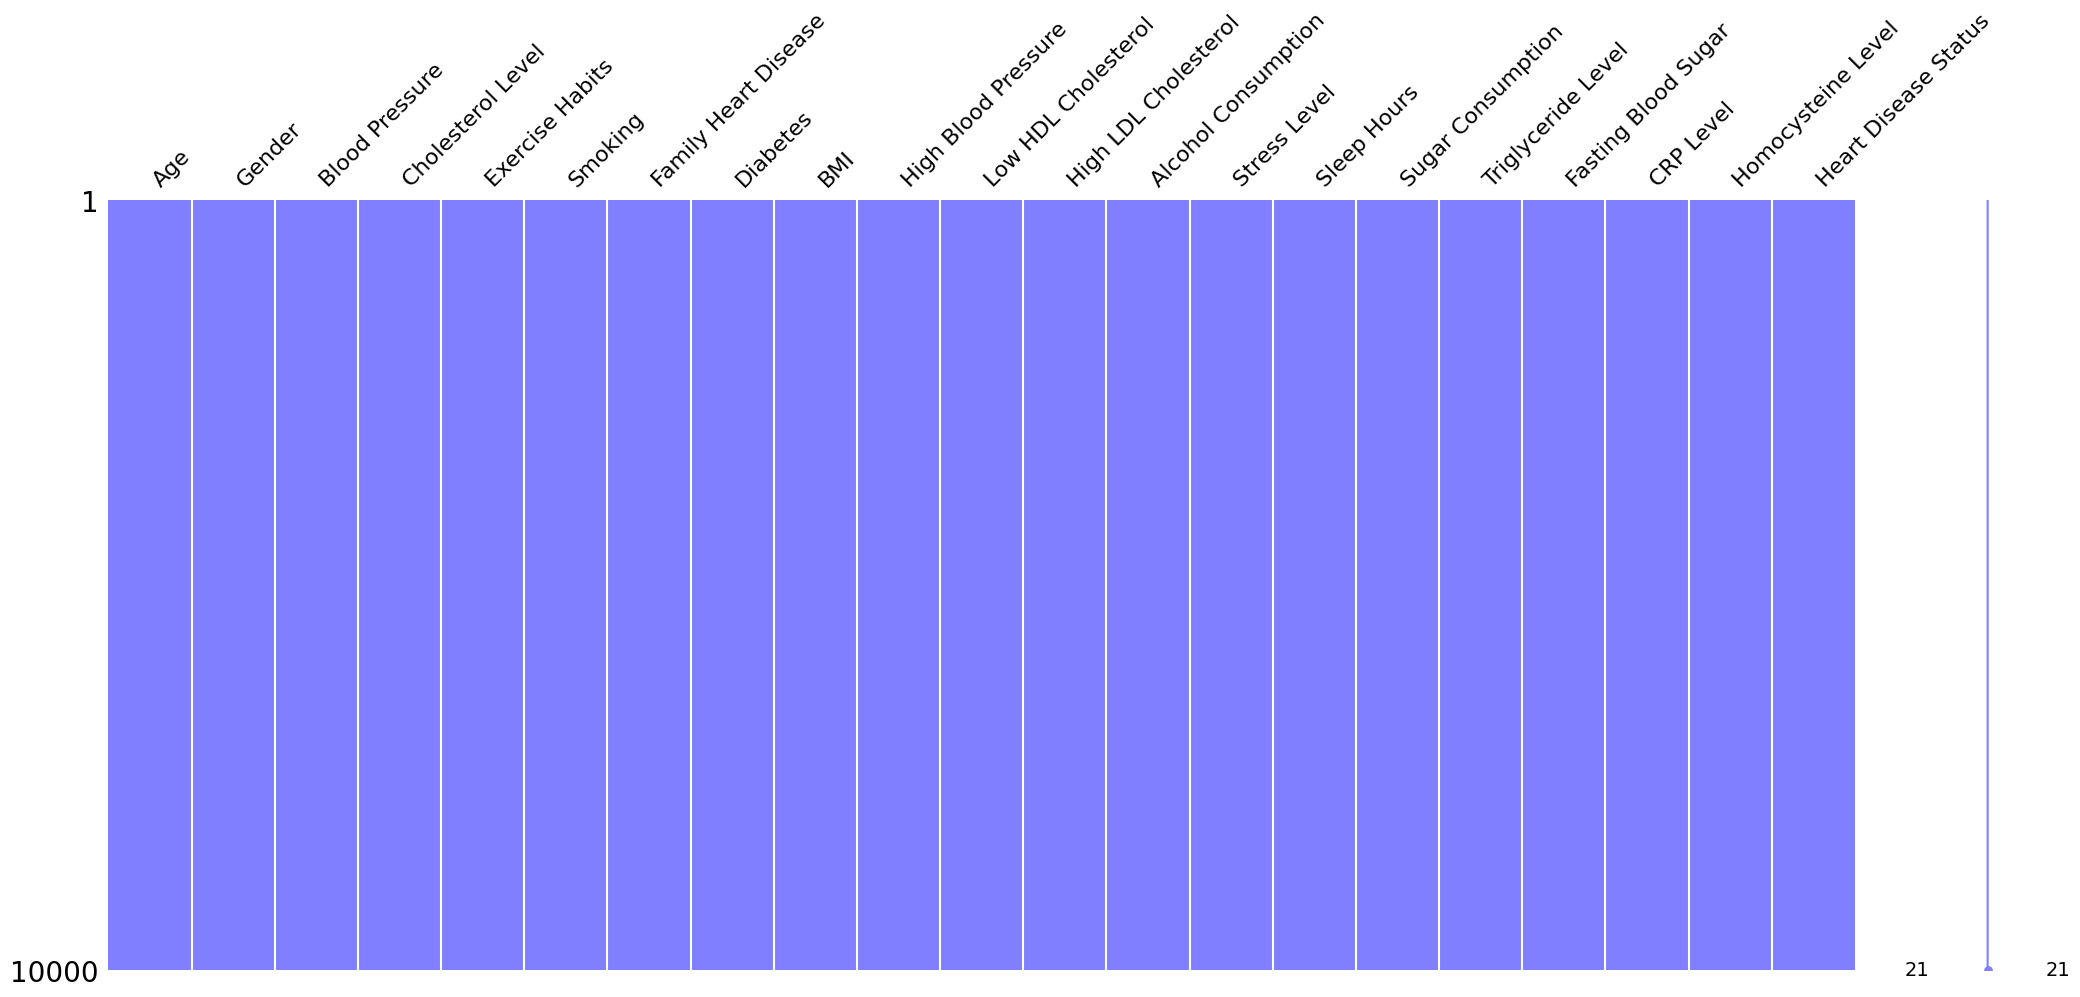

In [16]:
msno.matrix(df, color=(0.5, 0.5, 1))
plt.show()

In [17]:
print(df.isnull().sum())
print(df.isnull().mean() * 100)
print(df)

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64
Age                     0.0
Gender                  0.0
Blood Pressure          0.0
Cholesterol Level       0.0
Exercise Habits         0.0
Smoking                 0.0
Family Heart Disease    0.0
Diabetes                0.0
BMI                     0.0
High Blood Pressure     0.0
Low HDL Cholesterol     0.0
High LDL Cholesterol    0.0
Alcohol Consumption     0.0
Stress Level            0.0
Sleep Hours             0.0
Sugar Consumption    

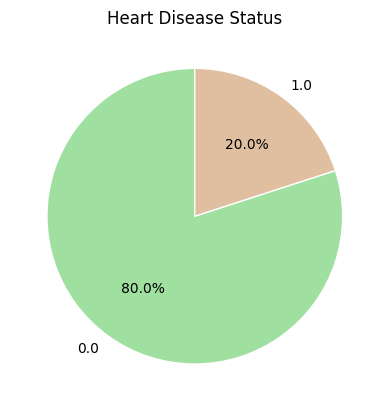

In [18]:
HDS = df["Heart Disease Status"].value_counts()
HDS.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#9fdf9f','#dfbf9f'], wedgeprops={'edgecolor': '#ffffff', 'linewidth': 1})
plt.title('Heart Disease Status')
plt.ylabel('')
plt.show()

In [19]:
df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,1.0,153.0,155.0,3.0,1.0,1.0,0.0,24.991591,1.0,...,0.0,3.0,2.0,7.633228,2.0,342.0,120.0,12.969246,12.387250,0.0
1,69.0,0.0,146.0,286.0,3.0,0.0,1.0,1.0,25.221799,0.0,...,0.0,2.0,3.0,8.744034,2.0,133.0,157.0,9.355389,19.298875,0.0
2,46.0,1.0,126.0,216.0,1.0,0.0,0.0,0.0,29.855447,0.0,...,1.0,1.0,1.0,4.440440,1.0,393.0,92.0,12.709873,11.230926,0.0
3,32.0,0.0,122.0,293.0,3.0,1.0,1.0,0.0,24.130477,1.0,...,1.0,1.0,3.0,5.249405,3.0,293.0,94.0,12.509046,5.961958,0.0
4,60.0,1.0,166.0,242.0,1.0,1.0,1.0,1.0,20.486289,1.0,...,0.0,1.0,3.0,7.030971,3.0,263.0,154.0,10.381259,8.153887,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,0.0,136.0,243.0,2.0,1.0,0.0,0.0,18.788791,1.0,...,1.0,2.0,3.0,6.834954,2.0,343.0,133.0,3.588814,19.132004,1.0
9996,38.0,1.0,172.0,154.0,2.0,0.0,0.0,0.0,31.856801,1.0,...,1.0,2.0,3.0,8.247784,1.0,377.0,83.0,2.658267,9.715709,1.0
9997,73.0,1.0,152.0,201.0,3.0,1.0,0.0,1.0,26.899911,0.0,...,1.0,2.0,1.0,4.436762,1.0,248.0,88.0,4.408867,9.492429,1.0
9998,23.0,1.0,142.0,299.0,1.0,1.0,0.0,1.0,34.964026,1.0,...,1.0,2.0,3.0,8.526329,2.0,113.0,153.0,7.215634,11.873486,1.0


In [20]:
df.to_csv('/content/drive/MyDrive/Project_CE/data/heart_disease_Cleaning.csv')